# Feature Engineering

# 1- Pipeline do Machine Learning

### Dados

Dados são observações do mundo real

### Por que coletamos dados?

Porque dados nos ajudam a responder perguntas.

### Trabalhar com dados

Trabalhar com dados não é algo simples.
São diversos entre eles, vêm de fontes distintas, usam aplicações diferentes...

Para isso é necessário uma modelagem matemática -> Modelagem estatística.


### Features (Características ou Recursos ou Atributos)

Features são as representações númericas de dados brutos.
Eles derivam a partir do dado disponível e há diversas formas de se realizar essa transformação.
A melhor transformação, dependerá do tipo de dado e modelo que será utilizado.


### Avaliação do modelo

DADOS -----------FEATURES + MODELOS----------------> INSIGHTS

        
Feature ruim = Modelo mais complicado





# 2 - Feature Engineering básica

## Dados numéricos

Os dados numéricos já estão em um formato que pode ser facilmente assimilado por modelos matemáticos, mas isso não significa que a engenharia de recursos não seja mais necessária.

Boas características não devem apenas representar aspectos salientes dos dados, mas também estar de acordo com as
**suposições do modelo**

### 1. Magnitude
Só precisamos saber se é positivo ou negativo? 
Ou talvez só precisemos saber a magnitude em uma granularidade muito grosseira?

Essa verificação é particularmente importante para números acumulados automaticamente, como contagens – o número de visitas diárias a um site, o número de avaliações recebidas por um restaurante, etc.

### 2. Escala dos recursos
Quais são os maiores e os menores valores?
Eles abrangem várias ordens de magnitude? 

Modelos que são funções suaves de recursos de entrada são sensíveis à escala da entrada. 

*Por exemplo, 3x + 1 é uma função linear simples da entrada x, e a escala de sua saída depende diretamente da escala da entrada.*
Outros exemplos incluem agrupamento k-means, métodos de vizinhos mais próximos, núcleos de função de base radial (RBF) e qualquer coisa que use a distância euclidiana. 
Para esses modelos e componentes de modelagem, geralmente é uma boa ideia normalizar os recursos para que a saída permaneça em uma escala esperada.

As funções lógicas, por outro lado, não são sensíveis à escala de recursos de entrada. 
Sua saída é binária, não importa quais sejam as entradas.
*Por exemplo, o AND lógico aceita quaisquer duas variáveis e gera 1 se e somente se ambas as entradas forem verdadeiras.*





Os **modelos de árvore de decisão** consistem em funções de etapa de recursos de entrada.

    Portanto, modelos baseados em árvores de partição de espaço (árvores de decisão, máquinas com gradiente impulsionado, florestas aleatórias)  não são sensíveis à escala.

    A única exceção é se a escala da entrada crescer ao longo do tempo, que é o caso se o recurso for uma contagem
    acumulada de algum tipo - eventualmente, ele crescerá fora do intervalo em que a árvore foi
    treinada. 

**Se este for o caso, pode ser necessário redimensionar as entradas periodicamente.**


### 3. Distribuição de recursos numéricos

**A distribuição resume a probabilidade de assumir um determinado valor.**

A distribuição dos recursos de entrada é mais importante para alguns modelos do que para outros.
Por exemplo, o processo de treinamento de um modelo de regressão linear assume que os erros de previsão são distribuídos
como um gaussiano. 
Isso geralmente é bom, exceto quando o alvo de previsão se espalha por várias ordens de magnitude. 
Nesse caso, a suposição de erro gaussiano provavelmente não é mais válida. 
Uma forma de lidar com isso é transformar a meta de produção para domar a magnitude do crescimento.
(Falando estritamente, isso seria engenharia de destino, não engenharia de recursos.) 


Transformações logarítmicas, que são um tipo de transformação de potência, levam a distribuição da variável mais próxima de Gaussiana.
Além dos recursos adaptados às suposições do modelo ou processo de treinamento, vários recursos podem ser compostos em conjunto em recursos mais complexos. 
A esperança é que recursos complexos possam capturar informações importantes de forma mais sucinta em dados brutos. 


## Escalares, Vetores e Espaços

* ESCALAR: Um único recurso numérico.
* VETOR: Uma lista ordenada de escalares. Os vetores ficam dentro de um espaço vetorial.
* ESPAÇO VETORIAL: forma de se visualizar os vetores de acordo com uma perspectiva.

Na grande maioria dos aplicativos de aprendizado de máquina, a entrada para um modelo geralmente é rep


## Binarização

Em um conjunto de dados de comportamento de escuta de músicas, não podemos necessariamente dizer que alguém que ouve 
uma música 20 vezes deve gostar dela duas vezes mais do que alguém que a ouve 10 vezes.

Uma representação mais robusta da preferência do usuário é binarizar a contagem e recortar
todas as contagens maiores que 1 para 1.

    Ou seja, se o usuário ouviu uma música pelo menos uma vez, contamos como o usuário gostou da música. 



### Quantificação ou binarização?

Contagens brutas que abrangem várias ordens de grandeza são problemáticas para muitos modelos.
Em um modelo linear, o mesmo coeficiente linear teria que funcionar para todos os valores possíveis da contagem.

Grandes contagens também podem causar estragos em métodos de aprendizado não supervisionados, como
agrupamento k-means, que usa a distância euclidiana como uma função de similaridade para medir a similaridade
entre os pontos de dados. 

Uma contagem grande em um elemento do vetor de dados superaria a similaridade em
todos os outros elementos, o que poderia prejudicar toda a medição de similaridade.




### Binning por faixa

Poderíamos dividir a quantidade por **faixas fixas**, por exemplo:
* 0-9 anos
* 10-19 anos
* 20-29 anos

Quanto poderíamos dividir a quantidade por **faixas fixas logarítimicas**, por exemplo:
* 0-9
* 10-99
* 100-1000

Quanto por faixas de quantis, como por exemplo:
* Distribuição pelos decis
* Distribuição pelos quartis


### Transformação logarítimica



A função log é o inverso da função exponencial.

A função log comprime o intervalo de números grandes e expande o intervalo
de números pequenos. 

Quanto maior for x, mais lentos serão os incrementos de log(x).

### Log em ação

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_houses = pd.read_csv('Datasets/house_prices_train.csv')
df_houses = df_houses.drop(columns='Id')
df_houses

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [57]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<AxesSubplot:ylabel='Frequency'>

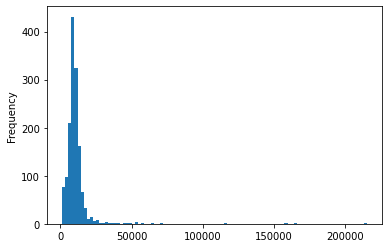

In [48]:
df_houses.LotArea.plot(kind='hist',bins=100)

<AxesSubplot:ylabel='Frequency'>

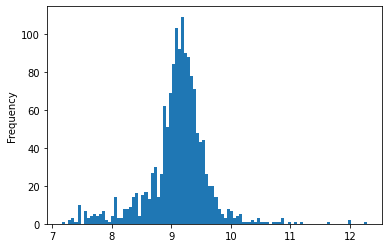

In [49]:
np.log(df_houses.LotArea).plot(kind='hist',bins=100)

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

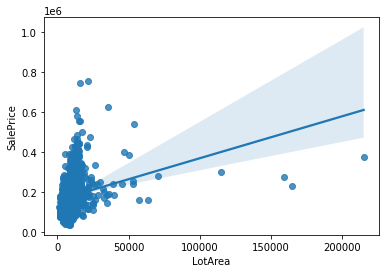

In [61]:
sns.regplot(data=df_houses,x='LotArea',y='SalePrice')

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

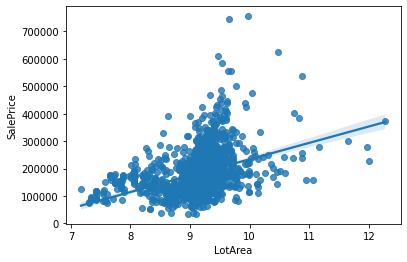

In [60]:
sns.regplot(data=df_houses,x=np.log(df_houses.LotArea),y='SalePrice')

Maior "espaço" para a regressão linear trabalhar.

### Transformação de potência

A transformação de log é um exemplo específico de uma família de transformações conhecidas como transformações de
potência. 

Em termos estatísticos, essas são transformações estabilizadoras de variância.

Para entender por que a estabilização da variância é boa, considere a distribuição de Poisson.
Esta é uma distribuição de cauda pesada com uma variância igual à sua média: portanto, quanto maior o centro de massa, 
maior a variância e mais pesada a cauda. 

Transformações de potência alteram a distribuição da variável para que a variância não dependa mais da média.

Uma generalização simples da transformação de raiz quadrada e da transformação de
log é conhecida como transformação **Box-Cox**

- A formulação Box-Cox só funciona quando os dados são positivos. 

- Para dados não positivos, pode-se mudar os valores adicionando uma constante fixa. 

- A o aplicar a transformação Box-Cox ou uma transformação de potência mais geral, temos que determinar um valor para o parâmetro ÿ. 

- Isso pode ser feito via máxima verossimilhança (encontrando o ÿ que maximiza a verossimilhança Gaussiana do sinal transformado resultante) ou métodos Bayesianos.

Scipy possui uma função que aplica a transformação box-cox.

In [8]:
#Verificando valor mínimo

df_houses.LotArea.min()

1300

In [10]:
from scipy import stats 

# Se definir o lmbda igual a zero a transformação será logarítimica.
rc_log = stats.boxcox(df_houses.LotArea, lmbda=0)

# Transformação box-cox
rc_bc, bc_params = stats.boxcox(df_houses.LotArea)

In [11]:
bc_params

0.03094631071248529

In [26]:
rc_log.

array([9.04192172, 9.16951838, 9.32812341, ..., 9.10963567, 9.18163221,
       9.20402044])

In [16]:
rc_bc

array([10.43367959, 10.60280885, 10.81397281, ..., 10.5233512 ,
       10.61890046, 10.64865613])

In [29]:
rc_bc.sum() - rc_log.sum()

2072.6053065865

In [17]:
rc_log_df = pd.DataFrame(rc_log,columns=['rc_log'])
rc_bc_df = pd.DataFrame(rc_bc,columns=['rc_bc'])

Text(0, 0.5, 'Ocorrência')

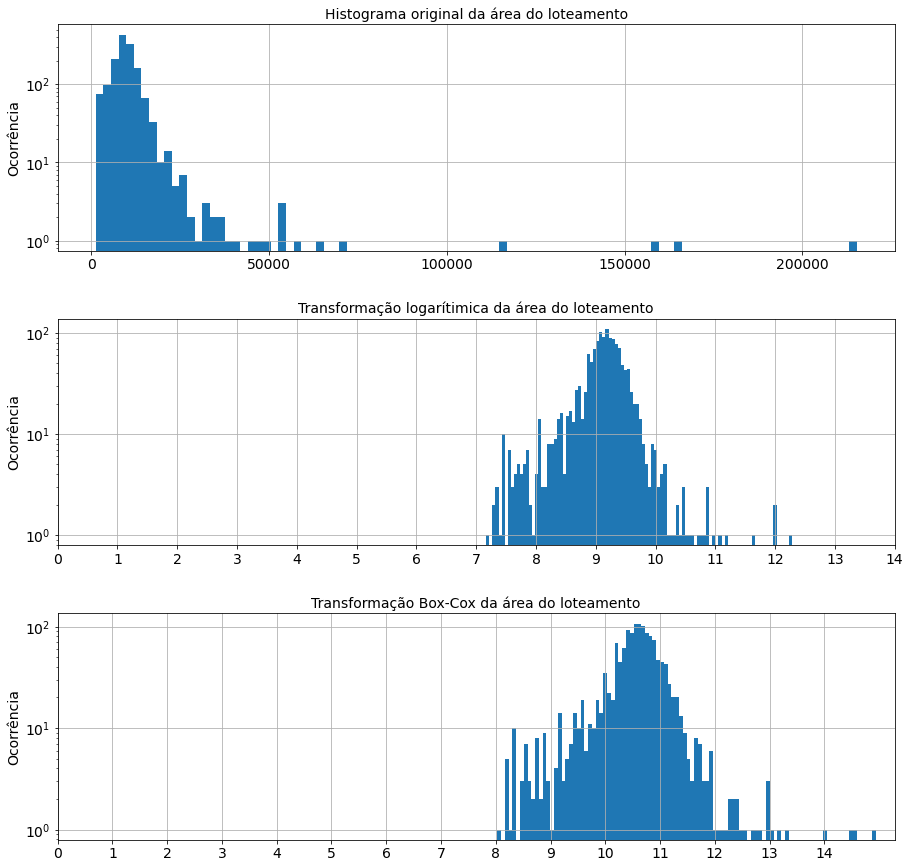

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15, 15))

# Histograma original
df_houses.LotArea.hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_title('Histograma original da área do loteamento', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Ocorrência', fontsize=14)
# Transformação logarítimica
rc_log_df.hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=14)
ax2.set_xticks(np.arange(0,15))
ax2.set_title('Transformação logarítimica da área do loteamento', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Ocorrência', fontsize=14)
# Transformação Box-Cox
rc_bc_df['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=14)
ax3.set_xticks(np.arange(0,15))
ax3.set_title('Transformação Box-Cox da área do loteamento', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Ocorrência', fontsize=14)

Um gráfico de probabilidade, ou probplot, é uma maneira fácil de comparar visualmente
uma distribuição empírica de dados com uma distribuição teórica. 

Este é essencialmente um gráfico de dispersão de quantis observados versus teóricos.

Text(0.5, 1.0, 'Probplot depois da transformação Box-Cox')

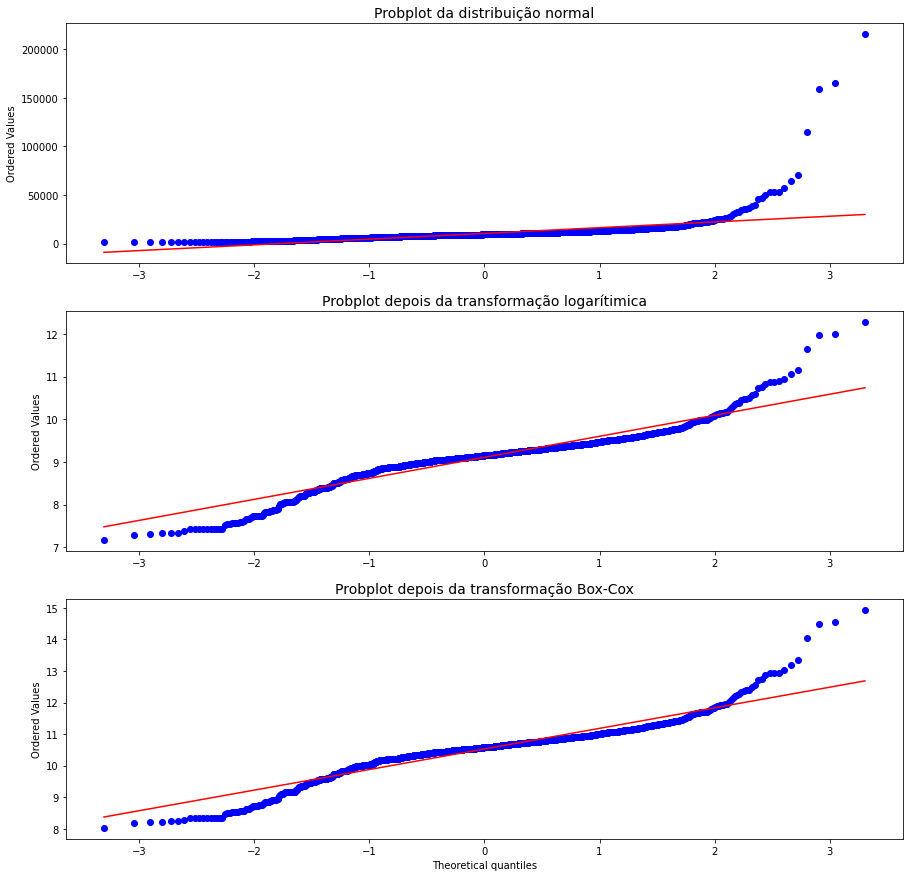

In [40]:
fig2, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15, 15))
prob1 = stats.probplot(df_houses.LotArea, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot da distribuição normal',size=14)
prob2 = stats.probplot(rc_log_df['rc_log'], dist=stats.norm, plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot depois da transformação logarítimica',size=14)
prob3 = stats.probplot(rc_bc_df['rc_bc'], dist=stats.norm, plot=ax3)
ax3.set_xlabel('Theoretical quantiles')
ax3.set_title('Probplot depois da transformação Box-Cox',size=14)

# Dimensionamento ou normalização de recursos - Feature Scaling or Normalization

# 3 - Engenharia de recursos para texto natural


# 4 - Feature Scaling


# 5 - Variáveis categóricas


# 6 - Redução de Dimensionalidade


# 7 - K-Means como técnica de Feature Engineering


# 8 - Feature Engineering em imagens


# 9 - Aplicando técnicas para a criação de um Recomendador